Kullanılan yapay zeka modeli: K-Means Clustering
    *Çok sayıda ham veriyi gruplandırmak için kullanılır.
    *unsupervised learning modeller grubuna giriyor.
    *Ham datayı gruplandırmak için önce kaç adet grup kullanacağımızı algoritmaya söylememiz gerek.

K-means algoritması çalışma mantığı:
    1. K adet centroid (merkez nokta) seçilir.
    2. Her veriyi(noktayı) kendisine en yakın centroid grubuna dahil eder.
    3. her centroidin merkezini kendi grubundaki noktalara bakarak tekrar hesaplar ve centroidi yeni merkez lokasyonu yapar.
    4. 2. ve 3. adımları centroidler artık yer değiştirmeyene kadar devam ettirir.
    5. artık centroidlerin merkezi değişmemektedir bu durumda gruplandırmayı bitirir.
    
    --> k değeri belirlenirken elbow metodu kullanılır. 
   Toplu verimiz olduğunda ve gruplandırma yapmak istediğimizde kullanabiliriz.
   

In [1]:
import numpy
import os #farklı işletim sistemleriyle tutarlı bir şekilde iletişim kurmak..
os.environ ["OMP_NUM_THREADS"] = "1"
#İşletim sistemimize bağlı olan yapıları döndürür. 

In [2]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

df = pd.read_csv("Avm_Musterileri.csv")

In [3]:
df.head()

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40


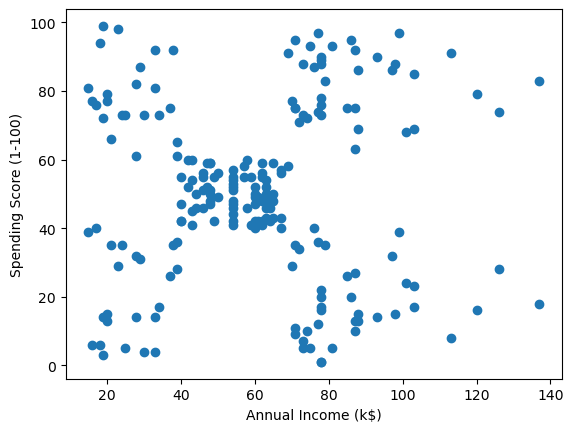

In [4]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [5]:
# Bazı sütun isimleri çok uzun onları kısaltalım:
df.rename(columns = {'Annual Income (k$)':'income'}, inplace = True)
df.rename(columns = {'Spending Score (1-100)':'score'}, inplace = True)

In [6]:
#modele verileri göndermeden önce mutlaka verileri normalize etmemiz gerek.
scaler = MinMaxScaler()

scaler.fit(df[['income']])
df['income'] = scaler.transform(df[['income']])

scaler.fit(df[['score']])
df['score'] = scaler.transform(df[['score']])

df.head()

,CustomerID,income,score
0,1,0.000000,0.387755
1,2,0.000000,0.816327
2,3,0.008197,0.051020
3,4,0.008197,0.775510
4,5,0.016393,0.397959


In [7]:
#önce k değeri belirlenecek
k_range = range(1,11)

list_dist = []

for k in k_range:
    kmeans_modeli= KMeans(n_clusters=k)
    kmeans_modeli.fit(df[['income','score']])
    list_dist.append(kmeans_modeli.inertia_)

/Users/dilarabuker/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dilarabuker/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dilarabuker/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dilarabuker/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
 

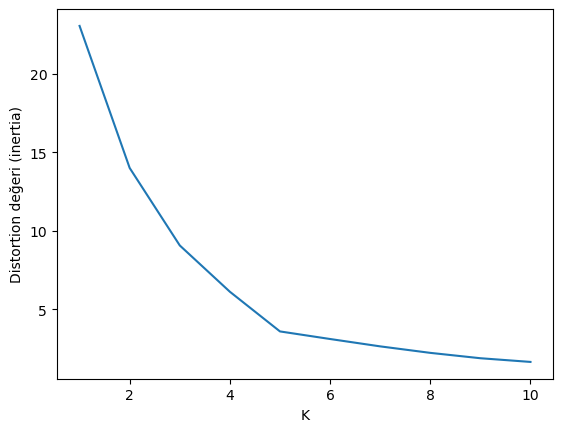

In [8]:
plt.xlabel('K')
plt.ylabel('Distortion değeri (inertia)')
plt.plot(k_range,list_dist)
plt.show()

In [9]:
# grafikten en iyi K değeri 5 olarak bulundu.

In [10]:
# K = 5 için bir K-Means modeli oluşturalım:
kmeans_modeli = KMeans(n_clusters = 5)
y_predicted = kmeans_modeli.fit_predict(df[['income','score']])
y_predicted

/Users/dilarabuker/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [11]:
df['cluster'] = y_predicted
df.head()

,CustomerID,income,score,cluster
0,1,0.000000,0.387755,3
1,2,0.000000,0.816327,4
2,3,0.008197,0.051020,3
3,4,0.008197,0.775510,4
4,5,0.016393,0.397959,3


In [13]:
# Centroidleri görelim:
kmeans_modeli.cluster_centers_   

array([[0.32858607, 0.49706633],
       [0.59631148, 0.16921769],
       [0.58638083, 0.82783883],
       [0.09265859, 0.20319432],
       [0.08792846, 0.79962894]])

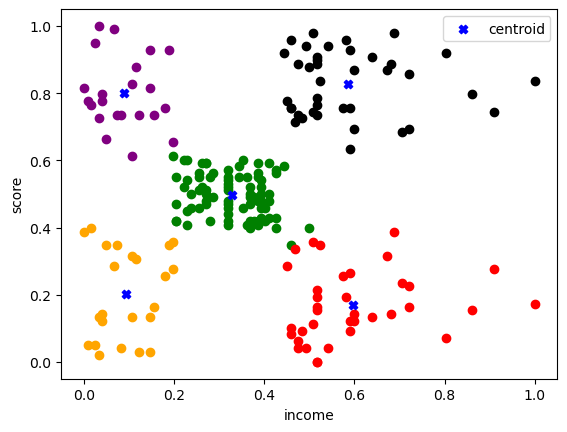

In [14]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]


plt.xlabel('income')
plt.ylabel(x'score')
plt.scatter(df1['income'],df1['score'],color='green')
plt.scatter(df2['income'],df2['score'],color='red')
plt.scatter(df3['income'],df3['score'],color='black')
plt.scatter(df4['income'],df4['score'],color='orange')
plt.scatter(df5['income'],df5['score'],color='purple')



# kmeans_modeli.cluster_centers_ numpy 2 boyutlu array olduğu için x ve y sütunlarını kmeans_modeli.cluster_centers_[:,0] 
# ve kmeans_modeli.cluster_centers_[:,1] şeklinde scatter plot için alıyoruz:
plt.scatter(kmeans_modeli.cluster_centers_[:,0], kmeans_modeli.cluster_centers_[:,1], color='blue', marker='X', label='centroid')
plt.legend()
plt.show()
